In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:


df = pd.read_csv("bank-full.csv") 

data = []
for i in df.values:
    for j in i:
        data.append(j.replace('"','').split(';'))

        
columns = 0
for i in df.columns:
    columns = i.replace('"','').split(';')

df = pd.DataFrame(data,columns=columns)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
convert_dict = {'age': int, 'job': str,'marital':str,'education':str, 'default':str, 'balance':int, 'housing':str,
       'loan':str, 'contact':str, 'day':int, 'month':str, 'duration':int, 'campaign':int, 'pdays':int,
       'previous':int, 'poutcome':str,"y":str} 

df = df.astype(convert_dict)
df.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [5]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

# Conveting Target Varible as 1 for yes and 0 for No

In [6]:
df['y'] = df['y'].replace({'yes':1, 'no':0})

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# As per EDA  and my understaninding following Data Performing  data cleaning, missing value treatment, outlier treatment on Data.

#  Coloum Name  "Job"  Data Type Categorical and Lables consits 14. As per plot I found that Data is splitted on the basis of Indian seasons like Summer , winter and Rainy season so i applied Ordinal encoding on the basis of season ( Target Guided Ordinal Encoding )


In [8]:
df.groupby(['job'])['y'].mean()


job
admin            0.000000
admin.           0.122074
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137585
mgmt             0.000000
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: y, dtype: float64

In [9]:
df.groupby(['job'])['y'].mean().sort_values().index

Index(['admin', 'mgmt', 'blue-collar', 'entrepreneur', 'housemaid', 'services',
       'technician', 'unknown', 'self-employed', 'admin.', 'management',
       'unemployed', 'retired', 'student'],
      dtype='object', name='job')

In [10]:
ordinal_labels=df.groupby(['job'])['y'].mean().sort_values().index
ordinal_labels

Index(['admin', 'mgmt', 'blue-collar', 'entrepreneur', 'housemaid', 'services',
       'technician', 'unknown', 'self-employed', 'admin.', 'management',
       'unemployed', 'retired', 'student'],
      dtype='object', name='job')

In [11]:
enumerate(ordinal_labels,0)

In [12]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'admin': 0,
 'mgmt': 1,
 'blue-collar': 2,
 'entrepreneur': 3,
 'housemaid': 4,
 'services': 5,
 'technician': 6,
 'unknown': 7,
 'self-employed': 8,
 'admin.': 9,
 'management': 10,
 'unemployed': 11,
 'retired': 12,
 'student': 13}

In [13]:
df['job']=df['job'].map(ordinal_labels2)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,6,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,3,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,2,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,7,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# Coloum Name  Education Data type Categorical and labes 4 Applied  Nomial Mean Encoding

In [14]:
#df['education'] = df['education'].replace({'primary':3,'secondary':1,'tertiary':2,'unknown':4})

In [15]:
mean_ordinal=df.groupby(['education'])['y'].mean().to_dict()


In [16]:
mean_ordinal

{'primary': 0.08626477886439936,
 'secondary': 0.10559434531505904,
 'tertiary': 0.15006390496955116,
 'unknown': 0.13570274636510501}

In [17]:
df['education']=df['education'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# Coloum Name Month Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [18]:
mean_ordinal=df.groupby(['month'])['y'].mean().to_dict()


In [19]:
mean_ordinal

{'apr': 0.19679399727148705,
 'aug': 0.11013286377461182,
 'dec': 0.4672897196261682,
 'feb': 0.1664779161947905,
 'jan': 0.10121168923734854,
 'jul': 0.09093546047860769,
 'jun': 0.10222804718217562,
 'mar': 0.519916142557652,
 'may': 0.06719453726572715,
 'nov': 0.10151133501259446,
 'oct': 0.43766937669376693,
 'sep': 0.46459412780656306}

In [20]:
df['month']=df['month'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,5,0.067195,261,1,-1,0,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,5,0.067195,151,1,-1,0,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,5,0.067195,76,1,-1,0,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,5,0.067195,92,1,-1,0,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,5,0.067195,198,1,-1,0,unknown,0


# Coloum Name "day" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [21]:
mean_ordinal=df.groupby(['day'])['y'].mean().to_dict()


In [22]:
mean_ordinal

{1: 0.2795031055900621,
 2: 0.14075792730085074,
 3: 0.164967562557924,
 4: 0.15916955017301038,
 5: 0.112565445026178,
 6: 0.09368530020703934,
 7: 0.0864061640066043,
 8: 0.10912052117263844,
 9: 0.11467008327994875,
 10: 0.23091603053435114,
 11: 0.12237998647734956,
 12: 0.15221459762944478,
 13: 0.15205047318611986,
 14: 0.11363636363636363,
 15: 0.13975337639459776,
 16: 0.13568904593639575,
 17: 0.09076843733883445,
 18: 0.09878682842287695,
 19: 0.06943653955606147,
 20: 0.06976744186046512,
 21: 0.09921026653504442,
 22: 0.17016574585635358,
 23: 0.134185303514377,
 24: 0.13870246085011187,
 25: 0.15833333333333333,
 26: 0.11207729468599034,
 27: 0.13380909901873328,
 28: 0.07814207650273224,
 29: 0.07392550143266476,
 30: 0.17305236270753513,
 31: 0.07153965785381027}

In [23]:
df['day']=df['day'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,1,-1,0,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,1,-1,0,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,1,-1,0,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,1,-1,0,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,1,-1,0,unknown,0


# Coloum Name "pdays" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [24]:
mean_ordinal=df.groupby(['pdays'])['y'].mean().to_dict()


In [25]:
mean_ordinal

{-1: 0.09157330735509012,
 1: 0.4,
 2: 0.05405405405405406,
 3: 0.0,
 4: 0.5,
 5: 0.0,
 6: 0.1,
 7: 0.0,
 8: 0.0,
 9: 0.25,
 10: 0.6666666666666666,
 12: 0.0,
 13: 0.5,
 14: 0.1111111111111111,
 15: 0.0,
 17: 0.25,
 18: 0.0,
 19: 0.0,
 20: 0.5,
 21: 0.25,
 22: 0.3333333333333333,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.25,
 28: 0.1111111111111111,
 29: 0.3333333333333333,
 30: 0.0,
 31: 0.2,
 32: 0.0,
 33: 0.5,
 34: 0.5,
 35: 0.375,
 36: 0.25,
 37: 0.25,
 38: 0.6666666666666666,
 39: 0.0,
 40: 0.42857142857142855,
 41: 0.4,
 42: 0.0,
 43: 0.5,
 44: 0.3333333333333333,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.5,
 49: 0.3333333333333333,
 50: 0.25,
 51: 0.0,
 52: 1.0,
 53: 0.6666666666666666,
 54: 0.0,
 55: 0.75,
 56: 0.4,
 57: 0.75,
 58: 0.3333333333333333,
 59: 0.0,
 60: 0.2857142857142857,
 61: 0.0,
 62: 0.2,
 63: 0.4444444444444444,
 64: 0.5,
 65: 1.0,
 66: 0.6666666666666666,
 67: 0.3333333333333333,
 68: 0.0,
 69: 0.25,
 70: 0.42857142857142855,
 71: 0.5,
 72: 0.5,
 73: 0.2,
 74: 0.428571

In [26]:
df['pdays']=df['pdays'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,1,0.091573,0,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,1,0.091573,0,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,1,0.091573,0,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,1,0.091573,0,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,1,0.091573,0,unknown,0


# Coloum Name "previous" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [27]:
mean_ordinal=df.groupby(['previous'])['y'].mean().to_dict()


In [28]:
mean_ordinal

{0: 0.09157330735509012,
 1: 0.21031746031746032,
 2: 0.21652421652421652,
 3: 0.2574430823117338,
 4: 0.23949579831932774,
 5: 0.2636165577342048,
 6: 0.2996389891696751,
 7: 0.2634146341463415,
 8: 0.3023255813953488,
 9: 0.2608695652173913,
 10: 0.3880597014925373,
 11: 0.23076923076923078,
 12: 0.22727272727272727,
 13: 0.23684210526315788,
 14: 0.2631578947368421,
 15: 0.05,
 16: 0.0,
 17: 0.2,
 18: 0.0,
 19: 0.18181818181818182,
 20: 0.125,
 21: 0.25,
 22: 0.16666666666666666,
 23: 0.125,
 24: 0.0,
 25: 0.0,
 26: 0.5,
 27: 0.0,
 28: 0.0,
 29: 0.25,
 30: 0.3333333333333333,
 32: 0.0,
 35: 0.0,
 37: 0.0,
 38: 0.0,
 40: 0.0,
 41: 0.0,
 51: 0.0,
 55: 1.0,
 58: 1.0,
 275: 0.0}

In [29]:
df['previous']=df['previous'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,1,0.091573,0.091573,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,1,0.091573,0.091573,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,1,0.091573,0.091573,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,1,0.091573,0.091573,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,1,0.091573,0.091573,unknown,0


# Coloum Name "campaign" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [30]:
mean_ordinal=df.groupby(['campaign'])['y'].mean().to_dict()


In [31]:
mean_ordinal

{1: 0.14597583219334245,
 2: 0.11203518592562975,
 3: 0.11193624343416048,
 4: 0.09000567859170926,
 5: 0.07879818594104308,
 6: 0.07126258714175059,
 7: 0.06394557823129252,
 8: 0.05925925925925926,
 9: 0.06422018348623854,
 10: 0.05263157894736842,
 11: 0.07960199004975124,
 12: 0.025806451612903226,
 13: 0.045112781954887216,
 14: 0.043010752688172046,
 15: 0.047619047619047616,
 16: 0.02531645569620253,
 17: 0.08695652173913043,
 18: 0.0,
 19: 0.0,
 20: 0.023255813953488372,
 21: 0.02857142857142857,
 22: 0.0,
 23: 0.0,
 24: 0.05,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0625,
 30: 0.0,
 31: 0.0,
 32: 0.1111111111111111,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 41: 0.0,
 43: 0.0,
 44: 0.0,
 46: 0.0,
 50: 0.0,
 51: 0.0,
 55: 0.0,
 58: 0.0,
 63: 0.0}

In [32]:
df['campaign']=df['campaign'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,0.145976,0.091573,0.091573,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,0.145976,0.091573,0.091573,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,0.145976,0.091573,0.091573,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,0.145976,0.091573,0.091573,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,0.145976,0.091573,0.091573,unknown,0


# Coloum Name Days  Data type Categorical and labes 31 Applied Nomial Mean Encoding

# Label encoding  Housing , Loan and Default

In [33]:
df['housing'] = df['housing'].replace({'yes':1, 'no':0})
df['default'] = df['default'].replace({'yes':1, 'no':0})
df['loan'] = df['loan'].replace({'yes':1, 'no':0})



In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,0,2143,1,0,unknown,0.112565,0.067195,261,0.145976,0.091573,0.091573,unknown,0
1,44,6,single,0.105594,0,29,1,0,unknown,0.112565,0.067195,151,0.145976,0.091573,0.091573,unknown,0
2,33,3,married,0.105594,0,2,1,1,unknown,0.112565,0.067195,76,0.145976,0.091573,0.091573,unknown,0
3,47,2,married,0.135703,0,1506,1,0,unknown,0.112565,0.067195,92,0.145976,0.091573,0.091573,unknown,0
4,33,7,single,0.135703,0,1,0,0,unknown,0.112565,0.067195,198,0.145976,0.091573,0.091573,unknown,0


# one Hot encoding Marital

In [35]:
df = pd.get_dummies(df, columns = ['marital'])
df = pd.get_dummies(df, columns = ['contact'])
df = pd.get_dummies(df, columns = ['poutcome'])



In [36]:
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,10,0.150064,0,2143,1,0,0.112565,0.067195,261,...,0,1,0,0,0,1,0,0,0,1
1,44,6,0.105594,0,29,1,0,0.112565,0.067195,151,...,0,0,1,0,0,1,0,0,0,1
2,33,3,0.105594,0,2,1,1,0.112565,0.067195,76,...,0,1,0,0,0,1,0,0,0,1
3,47,2,0.135703,0,1506,1,0,0.112565,0.067195,92,...,0,1,0,0,0,1,0,0,0,1
4,33,7,0.135703,0,1,0,0,0.112565,0.067195,198,...,0,0,1,0,0,1,0,0,0,1


# Change the unit of 'duration' from seconds to minutes

In [37]:
 
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,10,0.150064,0,2143,1,0,0.112565,0.067195,4.35,...,0,1,0,0,0,1,0,0,0,1
1,44,6,0.105594,0,29,1,0,0.112565,0.067195,2.52,...,0,0,1,0,0,1,0,0,0,1
2,33,3,0.105594,0,2,1,1,0.112565,0.067195,1.27,...,0,1,0,0,0,1,0,0,0,1
3,47,2,0.135703,0,1506,1,0,0.112565,0.067195,1.53,...,0,1,0,0,0,1,0,0,0,1
4,33,7,0.135703,0,1,0,0,0.112565,0.067195,3.30,...,0,0,1,0,0,1,0,0,0,1


# Drop rows that 'duration' < 5s

In [38]:

condition2 = (df['duration']<5/60)
df = df.drop(df[condition2].index, axis = 0, inplace = False)
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,10,0.150064,0,2143,1,0,0.112565,0.067195,4.35,...,0,1,0,0,0,1,0,0,0,1
1,44,6,0.105594,0,29,1,0,0.112565,0.067195,2.52,...,0,0,1,0,0,1,0,0,0,1
2,33,3,0.105594,0,2,1,1,0.112565,0.067195,1.27,...,0,1,0,0,0,1,0,0,0,1
3,47,2,0.135703,0,1506,1,0,0.112565,0.067195,1.53,...,0,1,0,0,0,1,0,0,0,1
4,33,7,0.135703,0,1,0,0,0.112565,0.067195,3.30,...,0,0,1,0,0,1,0,0,0,1


# Removing Outlier from Balance 

In [39]:
def remove_outlier(df , col_in):
    q1 = df[col_in].quantile(0.25)
    q3 = df[col_in].quantile(0.75)
    value = df[col_in].median()
    iqr = q3-q1
    x = list(df[col_in])
    y = []
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    for i in x:
        if (i < fence_low) or (i > fence_high):
            i = value
            y.append(i)
        else:
            y.append(i)
    df.drop(col_in,axis=1,inplace=True)
    df[col_in] = y

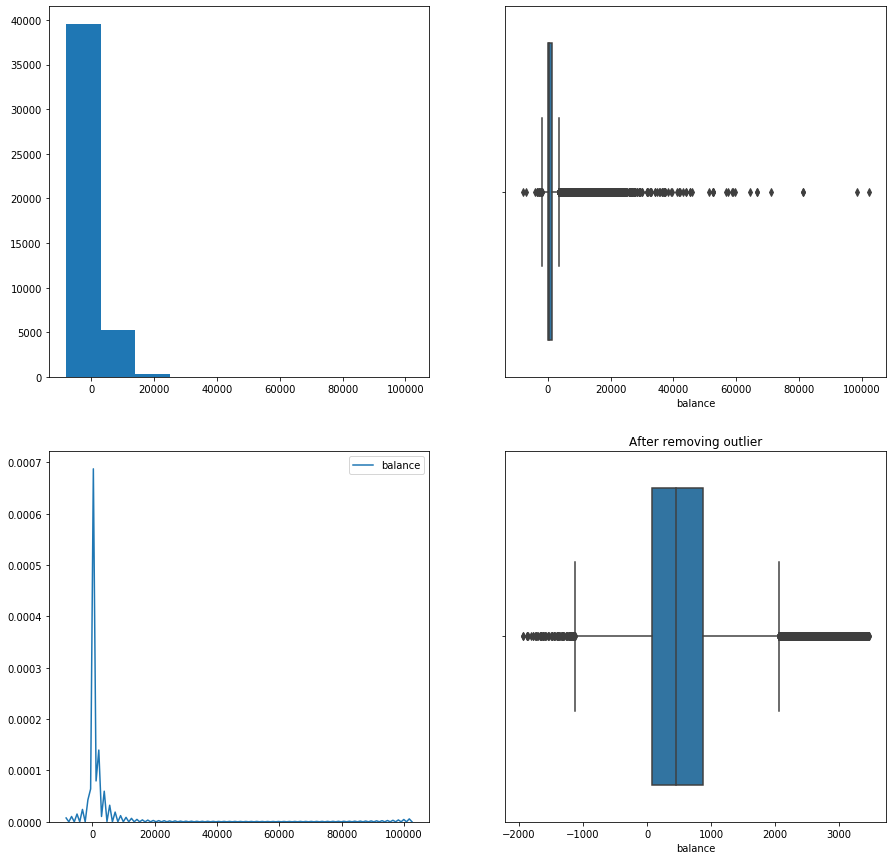

In [40]:
plt.figure(1,figsize=(15,15))
plt.subplot(221)   
plt.hist(df['balance'])
plt.subplot(222)
sns.boxplot(df['balance'])
plt.subplot(223)
sns.kdeplot(df['balance'])
remove_outlier(df,'balance')
plt.subplot(224)
plt.title("After removing outlier")
sns.boxplot(df['balance'])

# Appling Bucket of Age Coloum

In [41]:
def Age_estimator(i):
    a = 0
    if i<30:
        a = 20
    elif i>=30 and i<39:
        a = 30
    elif i>=40 and i<49:
        a = 40
    elif i>=50 and i<59:
        a = 50
    else:
        a = 60
    return a

In [42]:
df['age'] = df.age.apply(lambda x: Age_estimator(x))

In [43]:
df.head()

,age,job,education,default,housing,loan,day,month,duration,campaign,...,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,balance
0,50,10,0.150064,0,1,0,0.112565,0.067195,4.35,0.145976,...,1,0,0,0,1,0,0,0,1,2143.0
1,40,6,0.105594,0,1,0,0.112565,0.067195,2.52,0.145976,...,0,1,0,0,1,0,0,0,1,29.0
2,30,3,0.105594,0,1,1,0.112565,0.067195,1.27,0.145976,...,1,0,0,0,1,0,0,0,1,2.0
3,40,2,0.135703,0,1,0,0.112565,0.067195,1.53,0.145976,...,1,0,0,0,1,0,0,0,1,1506.0
4,30,7,0.135703,0,0,0,0.112565,0.067195,3.30,0.145976,...,0,1,0,0,1,0,0,0,1,1.0


In [44]:
df.columns

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'balance'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
y_res =  df["y"]
X_res = df.drop(columns=['age', 'job', 'education', 'default', 'housing', 'loan', 'day',
       'campaign', 'pdays', 'previous', 'y', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'balance'],axis=1)




# As per EDA i found that data is highly unblanced so i am appling Randomoversampler for balancing the data 

In [47]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [48]:
os = RandomOverSampler()
X_res,y_res = os.fit_sample(X_res,y_res)

In [49]:
X_res.shape

(79720, 2)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=42)

In [51]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools


In [52]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

In [53]:
X = np.array(X_train)
X

array([[0.09093546, 2.47      ],
       [0.16647792, 2.35      ],
       [0.10151134, 0.8       ],
       ...,
       [0.10222805, 2.72      ],
       [0.06719454, 5.98      ],
       [0.09093546, 1.        ]])

In [54]:
Y = np.array(y_train)

Y

array([0, 0, 0, ..., 1, 0, 0])

In [55]:
import numpy as np
from sklearn.svm import SVC

rs = np.random.RandomState(1234)

# Generate some fake data.
n_samples = 200
# X is the input features by row.
X = np.zeros((200,3))
X[:n_samples//2] = rs.multivariate_normal( np.ones(3), np.eye(3), size=n_samples//2)
X[n_samples//2:] = rs.multivariate_normal(-np.ones(3), np.eye(3), size=n_samples//2)
# Y is the class labels for each row of X.
Y = np.zeros(n_samples); Y[n_samples//2:] = 1

# Fit the data with an svm
svc = SVC(kernel='linear')
svc.fit(X,Y)

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.

z = lambda x,y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = go.FigureWidget()
fig.add_surface(x=x, y=y, z=z(x,y), colorscale='Greys', showscale=False)
fig.add_scatter3d(x=X[Y==0,0], y=X[Y==0,1], z=X[Y==0,2], mode='markers', marker={'color': 'blue'})
fig.add_scatter3d(x=X[Y==1,0], y=X[Y==1,1], z=X[Y==1,2], mode='markers', marker={'color': 'red'})
fig


<IPython.core.display.Javascript object>

FigureWidget({
    'data': [{'colorscale': [[0.0, 'rgb(255,255,255)'], [0.125,
                             'r…

In [56]:
X_train = np.array(X_train)
X_train

array([[0.09093546, 2.47      ],
       [0.16647792, 2.35      ],
       [0.10151134, 0.8       ],
       ...,
       [0.10222805, 2.72      ],
       [0.06719454, 5.98      ],
       [0.09093546, 1.        ]])

In [57]:
y_train = np.array(y_train)

y_train

array([0, 0, 0, ..., 1, 0, 0])

0.7992258814044954 0.0008354447539674101 KNN
0.8317683026896366 0.0026180876487687512 Random Forest
0.7277435429572279 0.0004925301320853739 Naive Bayes
0.8309798358091557 0.0020620836694633716 Stacking Classifier


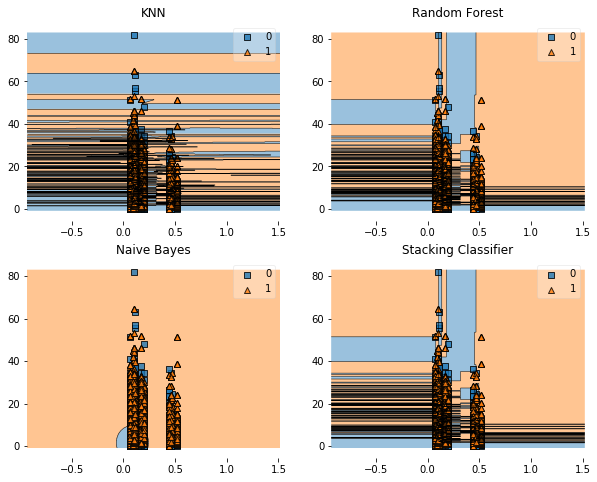

In [58]:
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    print (scores.mean(), scores.std(), label)
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf)
    plt.title(label)

plt.show()

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)

Accuracy: 0.8001218347054951 0.003112293796237859 KNN
Accuracy: 0.8312844750753127 0.002925192313661055 Random Forest
Accuracy: 0.7283348993793449 0.0005666328040037779 Naive Bayes
Accuracy: 0.8308723108547511 0.002556451702463469 Stacking Classifier


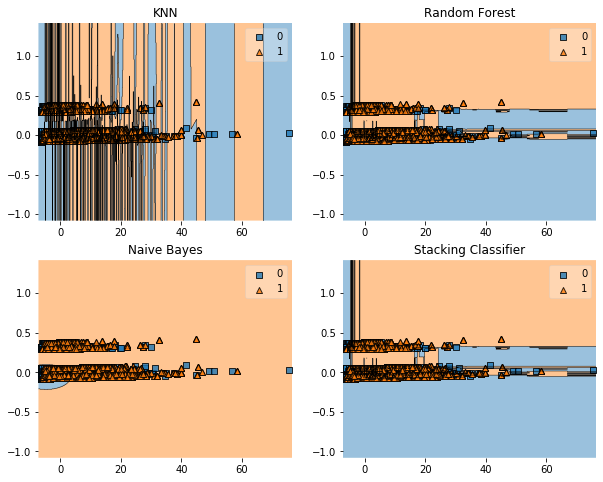

In [61]:
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X_train2, y_train, cv=3, scoring='accuracy')
    print ("Accuracy:" ,scores.mean(), scores.std(), label)
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X_train2, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train2, y=y_train, clf=clf)
    plt.title(label)

plt.show()